In [2]:
# imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.neural_network import MLPRegressor    

In [3]:
# loads dataset
df = pd.read_csv("../data/challenge/train.csv")
df2 = pd.read_csv("../data/challenge/additive.csv")
#adds columns
df["cap"] = df2["CAPTC_DIA"]
df["resg"] = df2["RESG_DIA"]
# df.drop(["Fluxo"],inplace=True,axis=1)

In [5]:
data_train = df[["DT_COMPTC"]][:3000]

#dados de treino
X_train = df.drop(["cap","DT_COMPTC"],axis=1)[:3000]
y_train = df[["cap"]][:3000]

#não sei bem pra que isso mas ajuda
data_test = df[["DT_COMPTC"]][3000:]

#dados de teste
X_test = df.drop(["cap","DT_COMPTC"],axis=1)[3000:]
y_test = df[["cap"]][3000:]

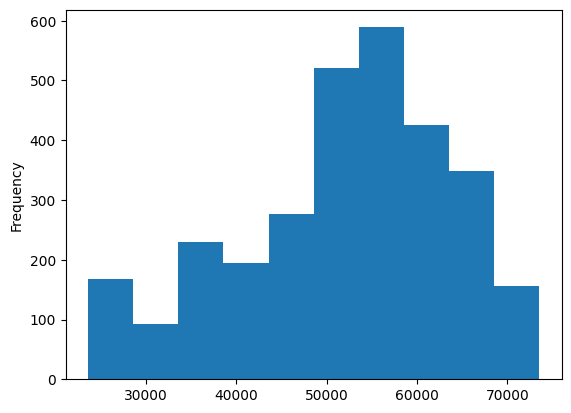

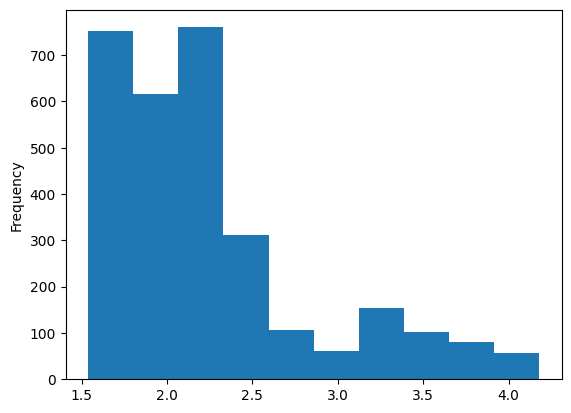

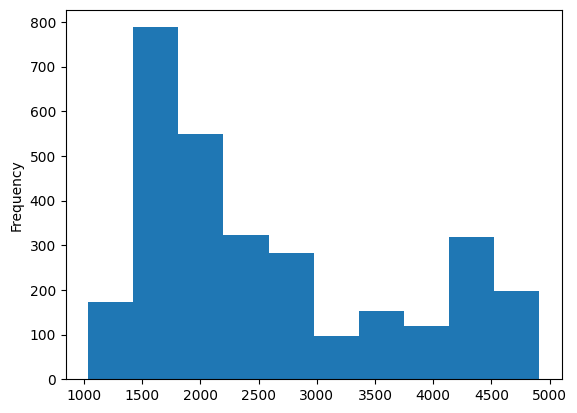

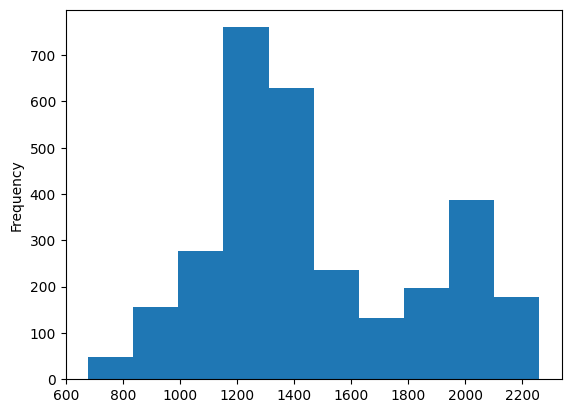

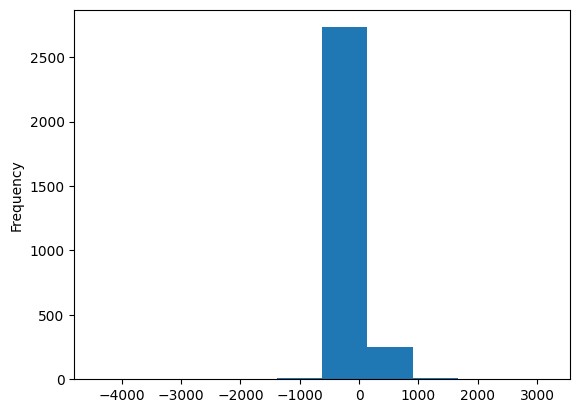

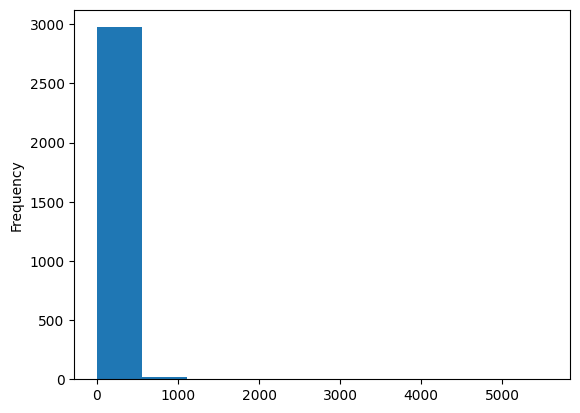

In [7]:
for column in pd.DataFrame(X_train).columns:
    pd.DataFrame(X_train)[column].plot.hist()
    plt.show()  

In [8]:
#padroniza os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
# y_test = scaler.fit_transform(y_test)

In [9]:
best_params = []

In [49]:
params = {
    "activation" : ["identity","relu"],
    "solver":["lbfgs","adam"],
    "shuffle":[True],
    "early_stopping":[True],
    "hidden_layer_sizes": (50, 20),
    "alpha" : [0.001]
} 
#aumentar número de camadas
 

gs = GridSearchCV(MLPRegressor(),params)

In [50]:
gs.fit(X_train,y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Pyt

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'relu'], 'alpha': [0.001],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(5, 5, 3, 2), (100, 50, 30, 20),
                                                (50, 20), (100,)],
                         'shuffle': [True], 'solver': ['lbfgs', 'adam']})

In [51]:
gs.best_params_

{'activation': 'identity',
 'alpha': 0.001,
 'early_stopping': True,
 'hidden_layer_sizes': (50, 20),
 'shuffle': True,
 'solver': 'lbfgs'}

In [31]:
best_params.append((params,gs.best_params_))

In [35]:
bestp = []
for test,best in best_params:
    bestp.append(best["hidden_layer_sizes"])


In [47]:
bestp

[(5, 5, 3, 2), (100, 50, 30, 20), (50, 20), (100,)]

In [15]:
model = gs.best_estimator_
tscv = TimeSeriesSplit()
cv_results = cross_val_score(MLPRegressor(activation= 'relu',
 early_stopping= True,
 shuffle= True,
 solver= "adam"),X_train,y_train,cv=5,scoring=make_scorer(mean_squared_error))


print(cv_results)

# model = RandomForestRegressor(1000)

# model.fit(X_train,y_train)

resposta = model.predict(X_test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\

[ 8817.65895627 39922.40743494 36470.78542782 66802.14455166
  7241.60751767]


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
df.corr()

,IBOV,Dol,NDX,SPX,Fluxo,cap,resg
IBOV,1.000000,0.635266,0.833133,0.797355,0.091723,0.649174,0.208245
Dol,0.635266,1.000000,0.925298,0.904620,0.038420,0.513351,0.198365
NDX,0.833133,0.925298,1.000000,0.977992,0.051630,0.597829,0.224206
SPX,0.797355,0.904620,0.977992,1.000000,0.059277,0.568180,0.203005
Fluxo,0.091723,0.038420,0.051630,0.059277,1.000000,0.205923,-0.892797
cap,0.649174,0.513351,0.597829,0.568180,0.205923,1.000000,0.256957
resg,0.208245,0.198365,0.224206,0.203005,-0.892797,0.256957,1.000000


In [18]:
df3 = pd.read_csv("../data/test.csv")

resposta = model.predict()

FileNotFoundError: [Errno 2] No such file or directory: '../data/test.csv'